#### 6.0 Decision Trees

#### 1. Classification

In [1]:
# Example 6.1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier         #  Decision Tree Classifier
from sklearn.model_selection import train_test_split    #  train_test_split function
from sklearn import metrics                             #  for accuracy calculation 

In [3]:
# Incase you get an error in importing libraries => !pip install

In [4]:
diabetes = pd.read_csv(r'C:\Users\user\Downloads\diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df = diabetes.copy()

In [6]:
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [7]:
# Select the features (X) and label (y) : 
X = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df['Outcome']

In [8]:
# Split into Train and Test :
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 80% training and 20% test

In [9]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf  = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf .predict(X_test)

In [10]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7922077922077922


In [11]:
# Do with 70% & determine the accuracy...   => Homework ********

<function matplotlib.pyplot.savefig(*args, **kwargs)>

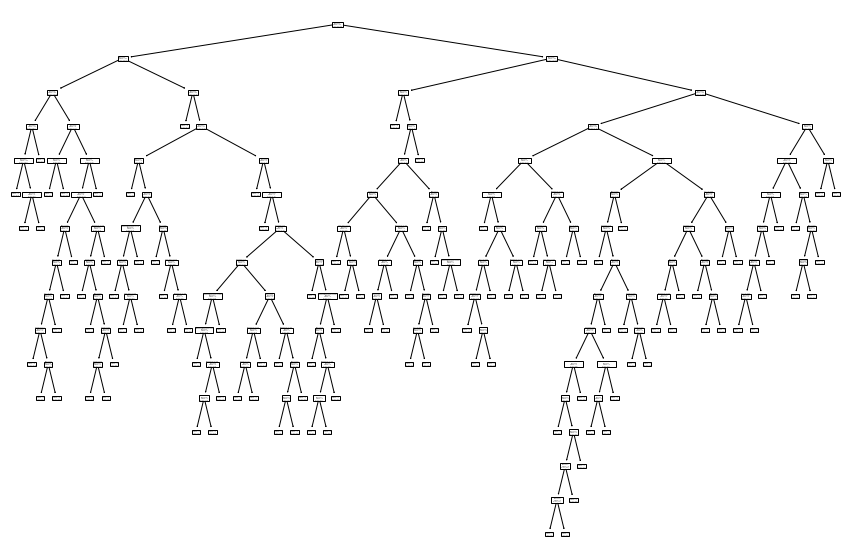

In [12]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,feature_names=features)
plt.savefig


[Text(0.3941482843137255, 0.96875, 'x[1] <= 123.5\ngini = 0.461\nsamples = 614\nvalue = [393, 221]'),
 Text(0.13786764705882354, 0.90625, 'x[7] <= 28.5\ngini = 0.301\nsamples = 352\nvalue = [287, 65]'),
 Text(0.05392156862745098, 0.84375, 'x[5] <= 30.95\ngini = 0.162\nsamples = 202\nvalue = [184, 18]'),
 Text(0.029411764705882353, 0.78125, 'x[0] <= 7.0\ngini = 0.036\nsamples = 110\nvalue = [108, 2]'),
 Text(0.0196078431372549, 0.71875, 'x[6] <= 0.672\ngini = 0.018\nsamples = 109\nvalue = [108, 1]'),
 Text(0.00980392156862745, 0.65625, 'gini = 0.0\nsamples = 99\nvalue = [99, 0]'),
 Text(0.029411764705882353, 0.65625, 'x[6] <= 0.697\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.0196078431372549, 0.59375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0392156862745098, 0.59375, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.0392156862745098, 0.71875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0784313725490196, 0.78125, 'x[2] <= 53.0\ngini = 0.287\nsamples = 92\n

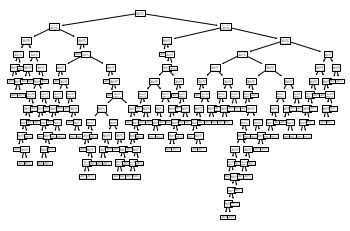

In [13]:
tree.plot_tree(clf)

<function matplotlib.pyplot.savefig(*args, **kwargs)>

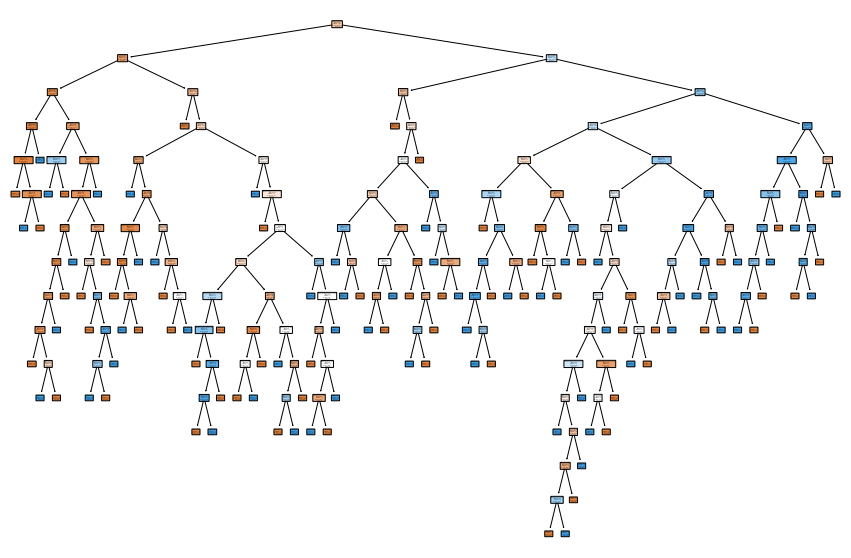

In [14]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,
               feature_names = features, 
               class_names='Outcome',
               rounded=True, 
               filled = True);
plt.savefig

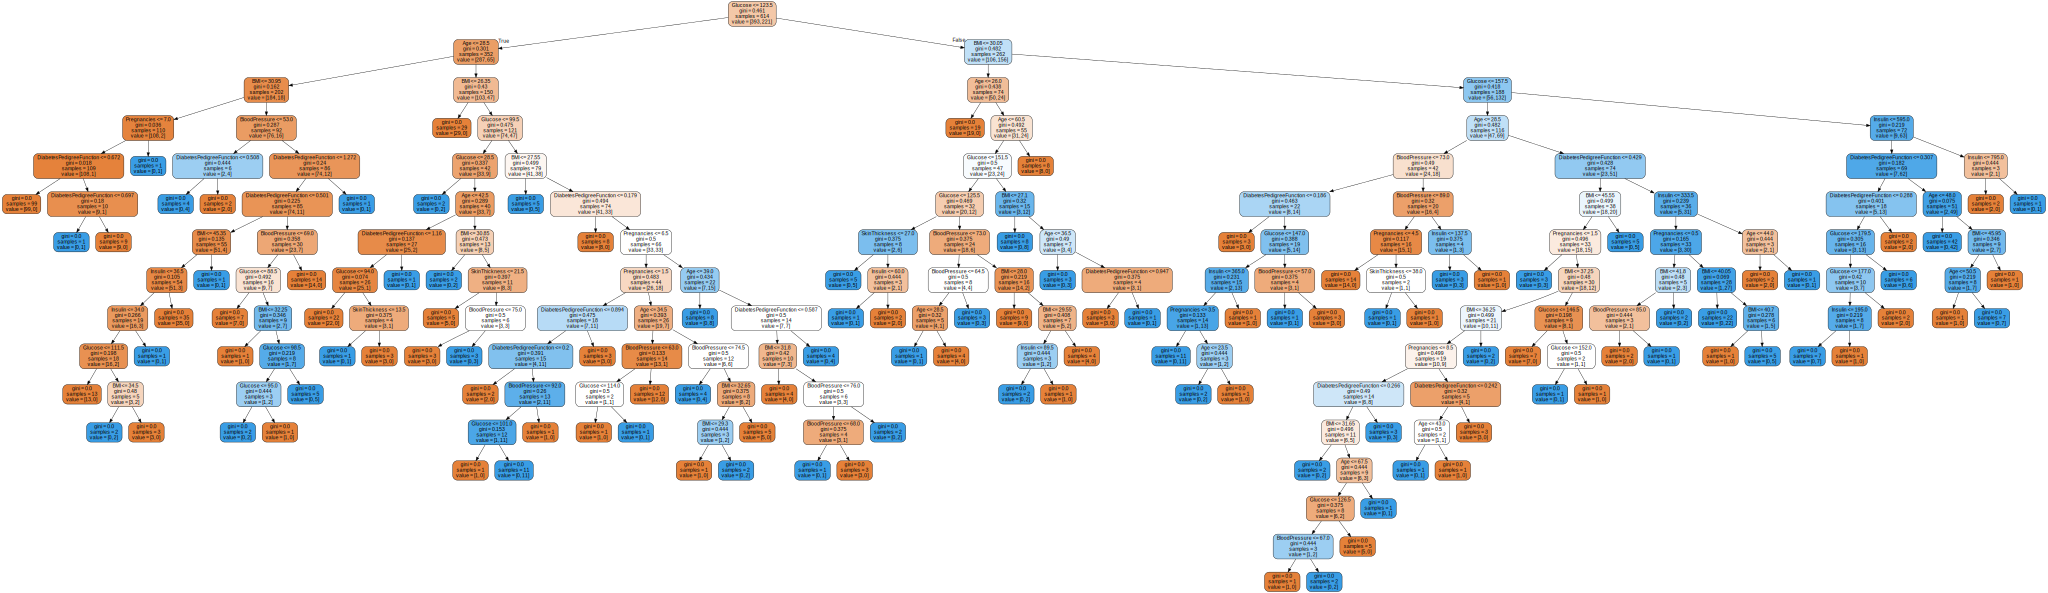

In [15]:
# Visualize the tree diagram of this model using Graphviz:

from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(clf,
                           feature_names=features,  
                           filled=True,
                           rounded=True)  

graph = graphviz.Source(dot_data)
#graph.render("tree") 
graph

In [ ]:
# Reducing te size of Decision Tree so that it fits:
import matplotlib.pyplot as plt
import pydotplus
import matplotlib.image as mpimg
import io

#from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

dot_data = io.StringIO()

export_graphviz(clf, out_file=dot_data, rounded=True, filled=True)

filename = "tree.png"
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png(filename)

plt.figure(figsize=(12,12))
img = mpimg.imread(filename)
imgplot = plt.imshow(img)

plt.show()